In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math
import scipy.stats as st
import statsmodels.stats.proportion as stp
import statsmodels.stats.weightstats as stw
from sklearn.linear_model import LinearRegression

In [87]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [88]:
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [89]:
df1['risk'].value_counts()/(len(df1)) *100

risk
0    50.496141
1    49.503859
Name: count, dtype: float64

In [90]:
# vigilance confidence interval 95%
sample_vigilance = df1['bat_landing_to_food']
vigilance_bar = sample_vigilance.mean()
vigilance_std = sample_vigilance.std()
vigilance_size=len(sample_vigilance)
# z-score (assuming 95% Confidence Level)
z_score = st.norm.ppf(q = 0.975)
print("Z-statistic: %.2f" % z_score)

# compute standard error
std_err = vigilance_std / math.sqrt(vigilance_size)
print(std_err)

ci_low_stm, ci_upp_stm = stw._zconfint_generic(vigilance_bar,std_err,alpha=0.05, alternative="two-sided")
print("Confidence Interval of the mean: %.2f to %.2f" % (ci_low_stm, ci_upp_stm))

Z-statistic: 1.96
0.9179175574639998
Confidence Interval of the mean: 9.91 to 13.51


 **We are 95% confident that the true population mean approach time is between 9.91 and 13.51 seconds**

In [91]:
bats_risk_taking = df1[df1['risk']==1]
bats_risk_avoiding = df1[df1['risk']==0]

In [92]:
# risk taking proportion, risk=1
prop = len(bats_risk_taking)

# sample size
total =len(df1['risk'])

# confidence level
conf_lvl = 0.95

# significance level (alpha)
sig_lvl = 1 - conf_lvl
# compute confidence interval for proportion (confidence level=95%)
ci_low, ci_upp = stp.proportion_confint(prop, total, alpha=sig_lvl, method="normal")
print("C.I. of proportion at %d%% confidence level is %.3f (%.1f%%) and %.3f (%.1f%%)." % 
      (conf_lvl*100, ci_low, ci_low*100, ci_upp, ci_upp*100))

C.I. of proportion at 95% confidence level is 0.463 (46.3%) and 0.528 (52.8%).


In [93]:
sample = df1["bat_landing_to_food"]
x_bar = st.tmean(sample)
s = st.tstd(sample)
print("\t Sample mean: %.2f" % x_bar)
print("\t Sample std. dev.: %.2f" % s)

	 Sample mean: 11.71
	 Sample std. dev.: 27.64


In [94]:
# perform one-sample t-test
# null hypothesis: population mean = 10
# alternative hypothesis: population mean > 10 (in the function below, note the argument 'greater')
t_stat, p_val = st.ttest_1samp(sample, 10, alternative="greater")
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stat)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")


 Computing t* ...
	 t-statistic (t*): 1.87

 Computing p-value ...
	 p-value: 0.0312

 Conclusion:
	 We reject the null hypothesis.


In [95]:
sample1 = bats_risk_taking['bat_landing_to_food'].to_numpy()
sample2 = bats_risk_avoiding['bat_landing_to_food'].to_numpy()

x_bar1 = st.tmean(sample1)
s1 = st.tstd(sample1)
n1 = len(sample1)
print("\t Statistics of sample 1: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar1, s1, n1))


# the basic statistics of sample 2:
x_bar2 = st.tmean(sample2)
s2 = st.tstd(sample2)
n2 = len(sample2)
print("\t Statistics of sample 2: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar2, s2, n2))



# perform two-sample t-test
# null hypothesis: mean of sample 1 = mean of sample 2
# alternative hypothesis: mean of sample 1 is greater than mean of sample 2 (one-sided test)
# note the argument equal_var=False, which assumes that two populations do not have equal variance
t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative='greater')
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stats)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")


	 Statistics of sample 1: 16.394 (mean), 32.746 (std. dev.), and 449 (n).
	 Statistics of sample 2: 7.124 (mean), 20.525 (std. dev.), and 458 (n).

 Computing t* ...
	 t-statistic (t*): 5.10

 Computing p-value ...
	 p-value: 0.0000

 Conclusion:
	 We reject the null hypothesis.


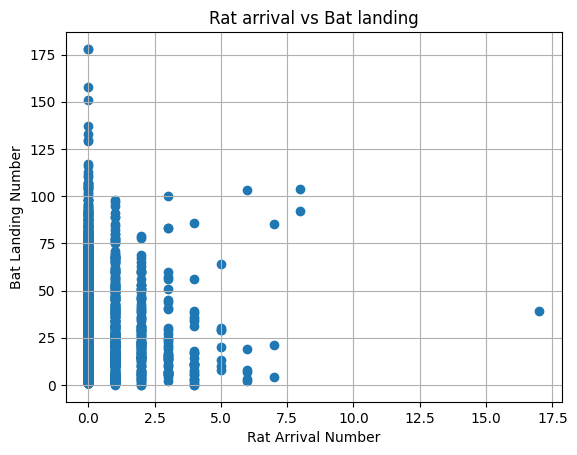

Model with intercept:
Intercept:  32.90514435372475
Coefficient:  [-1.84811596]


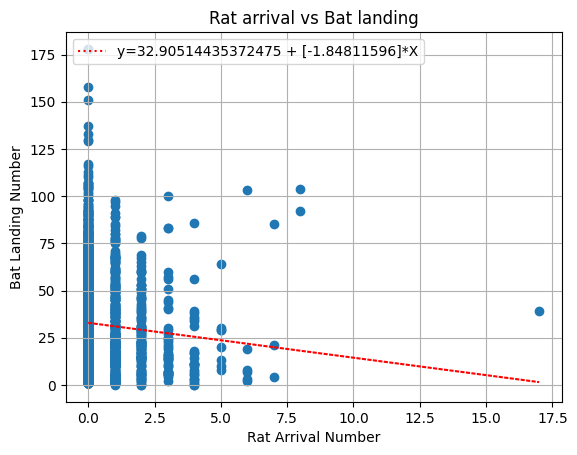

In [96]:
# Bats landing correlate to rats arrival 
X = df2['rat_arrival_number'].values
y = df2['bat_landing_number'].values


# Plot data points as a scatterplot 
plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Number")
plt.ylabel("Bat Landing Number")
plt.grid()
plt.show()


# Model 1 #
# Initialise a linear regression model
model = LinearRegression()

# Fit the linear regression model on the data
model.fit(X.reshape(-1,1), y)

# Get the intercept and coefficient values
intercept = model.intercept_
coeff_intercept = model.coef_ 
print("Model with intercept:")
print("Intercept: ", intercept)
print("Coefficient: ", coeff_intercept)

# Visualise the regression line over all data points
x_line1 = X
y_line1 = x_line1 * coeff_intercept + intercept

plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Number")
plt.ylabel("Bat Landing Number")
plt.plot(x_line1, y_line1, ":r", label=f"y={intercept} + {coeff_intercept}*X")
plt.legend(loc='upper left')
plt.grid()
plt.show()


**The Regression Plot showing decreasing bat landing while Rat arrival Number are increasing**